<a href="https://colab.research.google.com/github/MareMaltese/algoritmos-optimizacion/blob/main/Algoritmos_AG4_AgenteViajero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG4 - Actividad Guiada 4
Nombre: María del Mar Maltese Girón<br>
Link:   https://drive.google.com/file/d/18KDT_F3QNiK0A6_IatEcr57tlw-71Qnm/view?usp=sharing<br>
Github: https://github.com/MareMaltese/algoritmos-optimizacion
<br>


#Carga de librerias

In [1]:
#!pip install requests    #Hacer llamadas http a paginas de la red
#!pip install tsplib95    #Modulo para las instancias del problema del TSP

!pip install requests                     #Hacer llamadas http a paginas de la red
!pip install tabulate>=0.9 networkx>=3.0  # Actualiza las librerías 'tabulate' y 'networkx' a version compatibles con tsplib95
                                          # tabulate: Ayuda a crear tablas de texto legibles para presentar datos.
                                          # networkx:  Sirve para trabajar con grafos y redes, y realizar análisis sobre estas estructuras.
!pip install deprecated
!pip install tsplib95 --no-deps           #Modulo para las instancias del problemaaaaa del TSP

#Carga de los datos del problema

In [2]:
import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random         #Para generar valores aleatorios

#http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95
#Documentacion :
  # http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/en/stable/pages/usage.html
  # https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
  # https://pypi.org/project/tsplib95/

#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -df swiss42.tsp.gz     #Descomprimir el fichero de datos

#Coordendas 51-city problem (Christofides/Eilon)
#file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

#Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
#file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)




In [3]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())



In [4]:
Aristas
# https://github.com/ryanjoneil/tsplib/blob/master/elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),



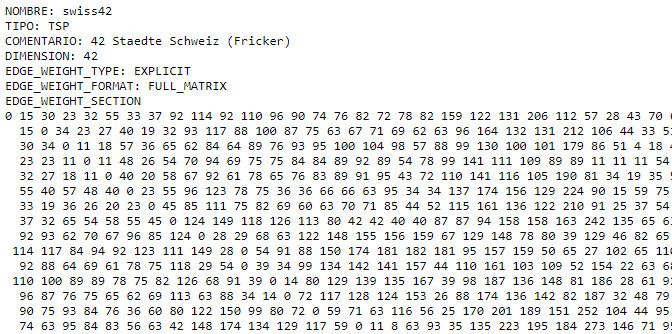

In [5]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
problem.get_weight(3, 0)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html

#dir(problem)

23

#Funciones basicas


In [6]:
#Funcionas basicas
###############################################################################

#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

sol_temporal = crear_solucion(Nodos)

distancia_total(sol_temporal, problem), sol_temporal
print(sol_temporal)
print(distancia_total(sol_temporal, problem))

[0, 34, 14, 9, 23, 13, 29, 33, 8, 1, 3, 28, 36, 10, 38, 32, 39, 27, 22, 30, 21, 6, 31, 19, 2, 16, 17, 11, 35, 24, 12, 37, 7, 25, 4, 26, 20, 5, 15, 41, 40, 18]
5019


#BÚSQUEDA ALEATORIA

In [7]:
###############################################################################
# BÚSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
  #N es el numero de iteraciones
  Nodos = list(problem.get_nodes())

  mejor_solucion = []
  #mejor_distancia = 10e100                         #Inicializamos con un valor alto
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto

  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)

    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia


  print("Mejor solución:" , mejor_solucion)
  print("Distancia     :" , mejor_distancia)
  return mejor_solucion
# solucion = solucion + [min(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]


#BÚSQUEDA aleatoria con 5000 iteraciones
solucion = busqueda_aleatoria(problem, 5000)

Mejor solución: [0, 36, 14, 19, 8, 21, 5, 4, 3, 41, 40, 22, 24, 2, 6, 15, 1, 17, 26, 27, 28, 30, 32, 10, 34, 33, 20, 38, 29, 37, 31, 7, 18, 39, 13, 9, 12, 11, 23, 25, 16, 35]
Distancia     : 3704


#BÚSQUEDA LOCAL

In [8]:
###############################################################################
# BÚSQUEDA LOCAL(1 paso)
###############################################################################
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      #... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problem))


nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))


Distancia Solucion Incial: 3704
Distancia Mejor Solucion Local: 3343


-------
# Tareas opcionales para mejorar nota:
## 1. Búsqueda local con entornos variables: Se puede mejorar con otros operadores de vecidad variables?


```
vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
```



### Como serian otros generadores de vecindad?

* Se elige una sub-lista y se invierte el orden ***generate_neighbor_reverse_order*** Es una buena solución para escapar de los mínimos locales.
* Se elige una sub-lista y se baraja ***generate_neighbor_shuffle*** Da más aleatoriedad a la solución.
* Se te ocurren otros? (entornos variables)
  * Intercambiar 3 ciudades en vez de dos para aumentar los cambios en la ruta ***generate_neighbor_3opt*** puede tardar más en conseguir una solución, ya que abre más el abanico.


## Genera una vecina invirtiendo el orden:

In [9]:
def generate_neighbor_reverse_order(solution):
    n = len(solution)
    i, j = sorted(random.sample(range(n), 2))  # Selecciona dos índices aleatorios
    vecina = solution[:i] + solution[i:j][::-1] + solution[j:]
    return vecina

## Genera una vecina barajando una sub-lista aleatoria:

In [10]:
def generate_neighbor_shuffle(solution):
    n = len(solution)
    i, j = sorted(random.sample(range(n), 2))  # Selecciona dos índices aleatorios
    sub_lista = solution[i:j+1]
    random.shuffle(sub_lista)
    vecina = solution[:i] + sub_lista + solution[j+1:]
    return vecina

## Intercambiar 3 ciudades en vez de 2


In [11]:
def generate_neighbor_3opt(solution):
    n = len(solution)
    i, j, k = sorted(random.sample(range(n), 3))  # Selecciona 3 nodos aleatorios

    # Generar 3-opt invirtiendo segmentos y reordenando
    vecina = solution[:i] + solution[j:k+1] + solution[i:j] + solution[k+1:]
    return vecina

## Adaptación de la funcion BÚSQUEDA_local a mi_BÚSQUEDA_local:

* Para que accepte por parametros el nombre de la funcion vecina a probar.
* Ejecute 10 veces para que veamos la efectividad de las diferentes vecinas

In [12]:
# Busqueda Local(iteraciones):
def mi_busqueda_local(solucion_referencia, problem, genera_vecina_func):
    mejor_solucion = solucion_referencia[:]
    mejor_distancia = distancia_total(solucion_referencia, problem)
    iteracion = 0
    min_iteraciones = 10  # Número mínimo de iteraciones antes de parar
    while True:
        iteracion +=1         #Incrementamos el contador
        vecina = genera_vecina_func(solucion_referencia)
        distancia_vecina = distancia_total(vecina, problem)
        if distancia_vecina < mejor_distancia:
            mejor_solucion = vecina                   #Guarda la mejor solución encontrada
            mejor_distancia = distancia_vecina
        if iteracion >= min_iteraciones and distancia_vecina >= mejor_distancia:
            print("En la iteración", iteracion, ", la mejor solución encontrada es:", mejor_solucion)
            print("Distancia:", mejor_distancia)
            return mejor_solucion

In [13]:
mi_nueva_solucion = genera_vecina(solucion)
print("Distancia Solucion Inicial:",distancia_total(mi_nueva_solucion, problem), " - ", nueva_solucion)
print()

print("Búsqueda local con función vecina - generate_neighbor_reverse_order")
sol1 = mi_busqueda_local(mi_nueva_solucion, problem, generate_neighbor_reverse_order)
print()

print("Búsqueda local con función vecina - generate_neighbor_shuffle")
sol1 = mi_busqueda_local(mi_nueva_solucion, problem, generate_neighbor_shuffle)
print()

print("Búsqueda local con función vecina - generate_neighbor_3opt")
sol1 = mi_busqueda_local(mi_nueva_solucion, problem, generate_neighbor_3opt)

Distancia Solucion Inicial: 3343  -  [0, 36, 14, 19, 8, 13, 5, 4, 3, 41, 40, 22, 24, 2, 6, 15, 1, 17, 26, 27, 28, 30, 32, 10, 34, 33, 20, 38, 29, 37, 31, 7, 18, 39, 21, 9, 12, 11, 23, 25, 16, 35]

Búsqueda local con función vecina - generate_neighbor_reverse_order
En la iteración 10 , la mejor solución encontrada es: [0, 36, 14, 7, 31, 37, 29, 38, 20, 33, 34, 10, 32, 30, 28, 27, 26, 17, 1, 15, 6, 2, 24, 22, 40, 41, 3, 4, 5, 13, 8, 19, 18, 39, 21, 9, 12, 11, 23, 25, 16, 35]
Distancia: 3330

Búsqueda local con función vecina - generate_neighbor_shuffle
En la iteración 10 , la mejor solución encontrada es: [0, 36, 14, 19, 8, 13, 5, 4, 3, 41, 40, 22, 24, 2, 6, 15, 1, 17, 26, 27, 28, 30, 32, 10, 34, 33, 20, 38, 29, 37, 31, 7, 18, 39, 21, 9, 12, 11, 23, 25, 16, 35]
Distancia: 3343

Búsqueda local con función vecina - generate_neighbor_3opt
En la iteración 10 , la mejor solución encontrada es: [0, 36, 14, 19, 8, 13, 5, 4, 3, 41, 40, 22, 24, 2, 6, 15, 1, 17, 26, 27, 28, 30, 32, 10, 34, 33, 20,

---

#SIMULATED ANNEALING

In [14]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
#Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))

  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]


#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [15]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 34, 17, 7, 5, 26, 2, 27, 22, 39, 24, 40, 21, 38, 30, 32, 33, 20, 35, 36, 31, 23, 9, 41, 10, 6, 14, 16, 15, 37, 19, 13, 1, 28, 29, 8, 25, 11, 12, 18, 4, 3]
con una distancia total de 2077


#Representación en un grafo a partir de la matriz de distancias( Optimización de posiciones usando escalado multidimensional (MDS)



Multidimensional scaling problem(MDS):   https://en.wikipedia.org/wiki/Multidimensional_scaling

In [16]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS  # Multidimensional Scaling o Escalado Multidimensional

def plot_tsp_solution(distance_matrix, tsp_solution):
    """
    Dibuja el grafo de un TSP con las posiciones calculadas mediante MDS y muestra
    solo las aristas correspondientes a la solución del TSP.

    :param distance_matrix: np.ndarray, matriz de distancias entre nodos
    :param tsp_solution: list, lista de nodos en el orden de la solución del TSP
    """
    # Crear el grafo completo
    G = nx.Graph()
    num_nodes = len(distance_matrix)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            G.add_edge(i, j, weight=distance_matrix[i][j])

    # Usar MDS para calcular posiciones de los nodos
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    positions = mds.fit_transform(distance_matrix)

    # Convertir las posiciones en un diccionario para networkx
    pos = {i: positions[i] for i in range(num_nodes)}

    # Crear un subgrafo con las aristas del camino TSP
    TSP_G = nx.Graph()
    for i in range(len(tsp_solution) - 1):
        u = tsp_solution[i]
        v = tsp_solution[i + 1]
        TSP_G.add_edge(u, v, weight=distance_matrix[u][v])

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # Dibujar las aristas del camino TSP
    nx.draw_networkx_edges(TSP_G, pos, edge_color='red', width=2)

    # Añadir etiquetas a los nodos y pesos de las aristas
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(TSP_G, 'weight')
    nx.draw_networkx_edge_labels(TSP_G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Grafo TSP con solución específica")
    plt.show()


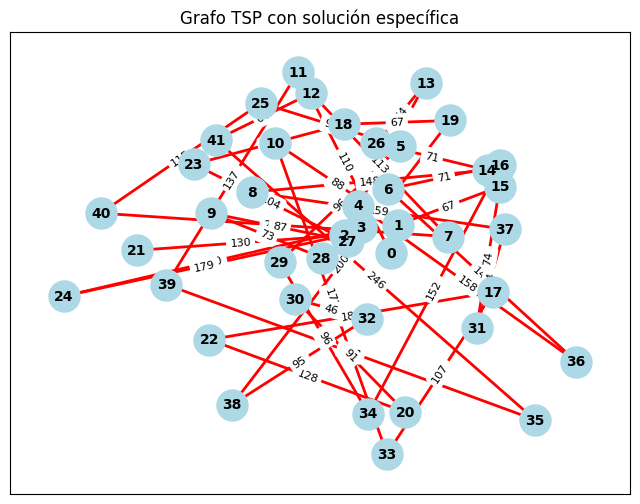

In [17]:
plot_tsp_solution(problem.edge_weights, crear_solucion(Nodos))

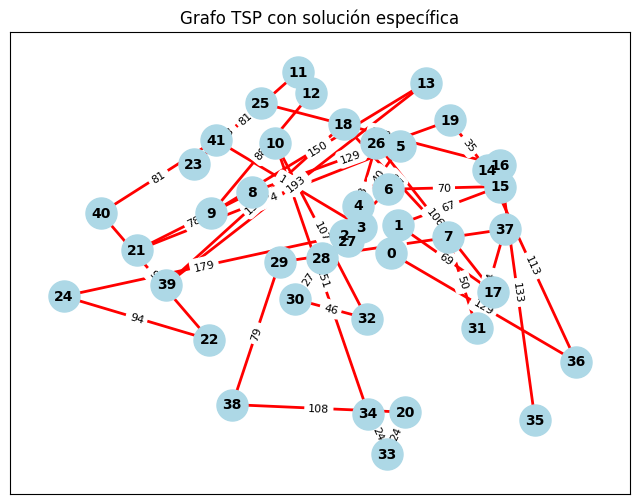

In [18]:
plot_tsp_solution(problem.edge_weights, solucion)

-------
# Tareas opcionales para mejorar nota:
# 2. Recocido simulado

Se puede mejorar con otra elección no tan aleatoria ```funcion genera_vecina_aleatorio()```?


> Sí, se puede mejorar utilizando estrategias más inteligentes en lugar de un cambio aleatorio


###**1. Estrategia 2-opt Mejorada**
En lugar de elegir dos nodos al azar, podemos seleccionar nodos:
- Los más alejados en distancia.
- Aquellos que forman aristas largas en la solución actual.

In [19]:
def genera_vecina_2opt(solucion, problem):
    # Selecciona dos nodos donde el intercambio reduzca la distancia total.
    mejor_vecina = solucion[:]
    mejor_distancia = distancia_total(mejor_vecina, problem)

    for i in range(1, len(solucion) - 1):
        for j in range(i + 1, len(solucion)):
            nueva_vecina = solucion[:]
            nueva_vecina[i:j] = reversed(nueva_vecina[i:j])  # Intercambia un segmento

            nueva_distancia = distancia_total(nueva_vecina, problem)
            if nueva_distancia < mejor_distancia:  # Asegura una mejora
                mejor_vecina = nueva_vecina[:]
                mejor_distancia = nueva_distancia

    return mejor_vecina


###**2. Intercambio Basado en Gradiente**
En lugar de elegir dos nodos al azar, se pretende eliminar los peores, eligiendo el nodo más distancia y se intercambia con otro nodo con menor.

In [20]:
def genera_vecina_gradiente(solucion, problem):
    mejor_vecina = solucion[:]
    max_contribucion = -1
    peor_nodo = None
    for i in range(1, len(solucion) - 1):
        contribucion = (problem.edge_weights[solucion[i-1]][solucion[i]] +
                        problem.edge_weights[solucion[i]][solucion[i+1]])
        if contribucion > max_contribucion:
            max_contribucion = contribucion
            peor_nodo = i
    if peor_nodo is not None:
        j = random.choice([x for x in range(1, len(solucion)) if x != peor_nodo])
        mejor_vecina[peor_nodo], mejor_vecina[j] = mejor_vecina[j], mejor_vecina[peor_nodo]

    return mejor_vecina


###**3. Estrategia Búsqueda con K-Vecinos**

En lugar de elegir dos nodos al azar, podemos explorar más.

Se evalúan k soluciones vecinas y se elige la mejor en lugar de hacer un solo cambio al azar

In [21]:
def genera_vecina_k_best(solucion, problem, k=5):
    mejores_vecinas = []
    distancias = []

    for _ in range(k):
        vecina = genera_vecina_aleatorio(solucion)
        distancia = distancia_total(vecina, problem)
        mejores_vecinas.append(vecina)
        distancias.append(distancia)

    return mejores_vecinas[np.argmin(distancias)]  # Retorna la mejor solución vecina


## Adaptación de la funcion recocido_simulado a mi_recocido_simulado:

* Para que acepte por parámetros el nombre de la función vecina a probar.

In [22]:
def mi_recocido_simulado(problem, TEMPERATURA, vecina_func):
  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)
  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo
  N=0
  while TEMPERATURA > .0001:
    N+=1
    vecina = vecina_func(solucion_referencia, problem)
    distancia_vecina = distancia_total(vecina, problem)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " ,mejor_solucion)
  print("con una distancia total de " , mejor_distancia)
  return mejor_solucion

## Probando resultados con las 3 estrategias:
❗Puede tardar un rato

In [23]:
print("mi_recocido_simulado con la estrategia 2-opt:")
resultado_2opt = mi_recocido_simulado(problem, TEMPERATURA=10000000, vecina_func=genera_vecina_2opt)
print()
print("mi_recocido_simulado con la estrategia de gradiente:")
resultado_gradiente = mi_recocido_simulado(problem, TEMPERATURA=10000000, vecina_func=genera_vecina_gradiente)
print()
print("mi_recocido_simulado con la estrategia k-best con k=5:")
resultado_k_best = mi_recocido_simulado(problem, TEMPERATURA=10000000, vecina_func=genera_vecina_k_best)

mi_recocido_simulado con la estrategia 2-opt:
La mejor solución encontrada es  [0, 1, 6, 5, 26, 4, 3, 27, 2, 28, 32, 20, 33, 34, 38, 22, 30, 29, 39, 24, 40, 21, 9, 23, 41, 8, 10, 25, 11, 12, 18, 13, 19, 14, 16, 15, 37, 7, 17, 36, 35, 31]
con una distancia total de  1420

mi_recocido_simulado con la estrategia de gradiente:
La mejor solución encontrada es  [0, 1, 4, 3, 10, 21, 24, 39, 25, 12, 11, 5, 19, 13, 18, 8, 23, 41, 32, 17, 36, 35, 34, 20, 31, 16, 14, 15, 37, 7, 6, 26, 2, 27, 30, 22, 40, 9, 28, 29, 38, 33]
con una distancia total de  2250

mi_recocido_simulado con la estrategia k-best con k=5:
La mejor solución encontrada es  [0, 28, 8, 29, 30, 34, 33, 20, 32, 27, 2, 3, 4, 6, 5, 26, 10, 41, 23, 39, 21, 40, 24, 38, 22, 9, 25, 11, 12, 18, 13, 19, 14, 16, 15, 37, 17, 36, 35, 31, 7, 1]
con una distancia total de  1553
